In [959]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from pathlib import Path

colors = ["#E69F00" ,"#009E73" ,"#0072B2" ,"#999999", "#56B4E9", "#F0E442", "#CC79A7", "#D55E00"]
markers = ["v", "x", "o", "^", "s", "<", ">", "8"]

plt.rcParams.update({
        'font.size': '18',
        'svg.fonttype': 'none'
})

plt.rc('axes', axisbelow=True)

%config Completer.use_jedi = False

In [960]:
def make_line_chart(x,y, labels, xlabel="", ylabel="", name="result.png", legend_location="best"):
    linewidth = 2
    fig = plt.subplots(figsize =(6, 2.5))

    plt.minorticks_on()
    
    plt.grid(color='lightgrey', linestyle='-', linewidth=1, which="minor")
    plt.grid(color='grey', linestyle='-', linewidth=1, which="major")
    
    for x_values, y_values, label, color in zip(x, y, labels, colors):
        plt.plot(x_values, y_values, label=label, linewidth=linewidth, color=color)
        
        
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: int(t[0]) if t[0].isnumeric() else 0))
    if legend_location == "upper center":
        ncol = 4
        height = (len(lables) / ncol + 1) * 0.2 + 1
        plt.legend(handles, labels, frameon=False, ncol=ncol, loc="upper center", bbox_to_anchor=(0.5,height), fontsize=14 ,labelspacing=1, columnspacing=2)
    else:        
        plt.legend(handles, labels, frameon=False, loc="lower right", bbox_to_anchor=(0.85,0), fontsize=10 ,labelspacing=1, columnspacing=2)
    
    plt.savefig(name, bbox_inches='tight')
    plt.show()
    

In [961]:
def add_labels(x,y, precision):
    overset = 0.1 * max(y)
    for i in range(len(x)):
        if precision == -1:
            plt.text(i + 0.25, y[i] + overset, round(y[i]), ha = 'center')
        else:
            plt.text(i + 0.25, y[i] + overset, round(y[i], precision), ha = 'center')

In [962]:
def make_bar_chart(x,y, xlabel="", ylabel="", name="result.png", lables=True, lableprecision=-1):
    barWidth = 0.25
    fig = plt.subplots(figsize =(6, 2.5))
    
    plt.minorticks_on()
    
    plt.grid(color='lightgrey', linestyle='-', linewidth=1, which="minor")
    plt.grid(color='grey', linestyle='-', linewidth=1, which="major")
    
    y = [val for _,val in sorted(zip(x,y))]
    x.sort()
    
    x = [str(int(i)) if not pd.isna(i) else "Never" for i in x]

    
    num_elements_in_x = len(x)

    # Set position of bar on X axis\n",
    br1 = list(map(lambda x: x + barWidth, np.arange(num_elements_in_x)))

    # Make the plot\n",
    plt.bar(br1, y, color=colors, width=barWidth,edgecolor ='black')
    
    if lables:
        add_labels(br1, y, lableprecision)
    
    # Adding Xticks\n",
    plt.xlabel(xlabel)
    plt.xticks([r + barWidth for r in range(num_elements_in_x)], x)
    plt.gca().xaxis.set_minor_locator(tck.NullLocator())
    plt.gca().xaxis.set_major_locator(tck.NullLocator())
    
    plt.ylabel(ylabel)

    ylim_max = max(y) * 1.3
    plt.gca().set_ylim(None, ylim_max)

    plt.savefig(name, bbox_inches='tight')
    plt.show()
    

In [963]:
def combine_column_and_file_name(column, file):
    return f'{file}_{column}'

In [964]:
def get_data(columns: list[str]):
    base_dir = Path('../experiment/20220124')
    csv_files = base_dir.glob('*.csv')
    
    dfs = {file.name : pd.read_csv(file) for file in csv_files}
    
    res_df = pd.DataFrame()
    for file_name, df in dfs.items():
        for column in columns:
            res_df[combine_column_and_file_name(file_name, column)] = df[column]
    return res_df

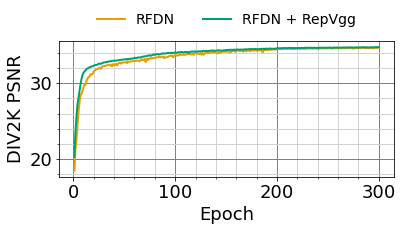

In [965]:
data = get_data(["validate.DIV2K.psnr_scale_2", "Epoch"])
filtered_x = data.filter(regex=("Epoch_rfdn.*_600.csv")).head(300).transpose()
filtered_y = data.filter(regex=("validate\.DIV2K.psnr_scale_2.*_600.csv")).head(300).transpose()
lables = ["RFDN", "RFDN + RepVgg"]
make_line_chart(filtered_x.values, filtered_y.values, lables, "Epoch", "DIV2K PSNR", "epoch_psnr_scale.svg", legend_location="upper center")

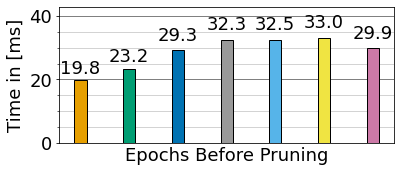

In [966]:
data = get_data(["validate.mean_forward_pass_time", "config.epochs_before_pruning"])
filtered_y = data.filter(regex=("validate\.mean_forward_pass_time_rfdn_advanced_600_epochs_before_pruning.*")).mean()
filtered_x = data.filter(regex=("config\.epochs_before_pruning_rfdn_advanced_600_epochs_before_pruning.*")).head(1)
make_bar_chart(filtered_x.values[0], filtered_y.values * 1000, "Epochs Before Pruning", "Time in [ms]", "epochs_before_pruning_average_validation_time.svg", True, lableprecision=1)

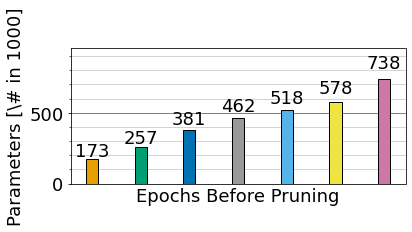

In [967]:
data = get_data(["num_parameters", "config.epochs_before_pruning"])
filtered_y = data.filter(regex=("num_parameters_rfdn_advanced_600_epochs_before_pruning.*")).min()
filtered_x = data.filter(regex=("config\.epochs_before_pruning_rfdn_advanced_600_epochs_before_pruning.*")).head(1)
make_bar_chart(filtered_x.values[0], filtered_y.values / 1000, "Epochs Before Pruning", "Parameters [\# in 1000]", "epochs_before_pruning_final_number_of_parameters.svg", True, lableprecision=-1)

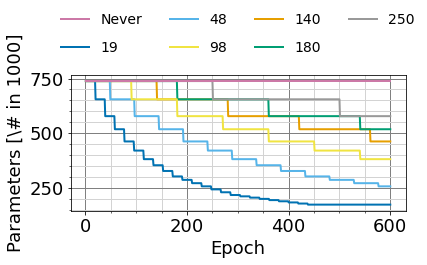

In [968]:
data = get_data(["num_parameters", "Epoch"])
filtered_x = data.filter(regex=("Epoch_rfdn_advanced_600_epochs_before_pruning.*")).head(600).transpose()
filtered_y = data.filter(regex=("num_parameters_rfdn_advanced_600_epochs_before_pruning.*")).head(600).transpose()
lables = [140, 180, 19, 250, 48, 98, "Never"]
make_line_chart(filtered_x.values, filtered_y.values / 1000, lables, "Epoch", "Parameters [\# in 1000]", "epochs_before_pruning_number_of_parameters.svg", legend_location="upper center")

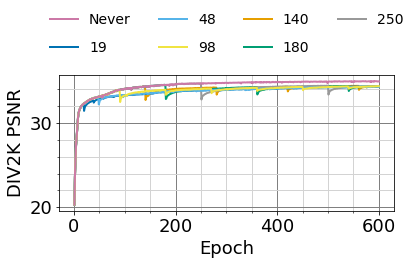

In [969]:
data = get_data(["validate.DIV2K.psnr_scale_2", "Epoch"])
filtered_x = data.filter(regex=("Epoch_rfdn_advanced_600_epochs_before_pruning.*")).head(600).transpose()
filtered_y = data.filter(regex=("validate\.DIV2K.psnr_scale_2_rfdn_advanced_600_epochs_before_pruning.*")).head(600).transpose()
lables = [140, 180, 19, 250, 48, 98, "Never"]
make_line_chart(filtered_x.values, filtered_y.values, lables, "Epoch", "DIV2K PSNR", "epochs_before_pruning_div2k_psnr.svg", legend_location="upper center")

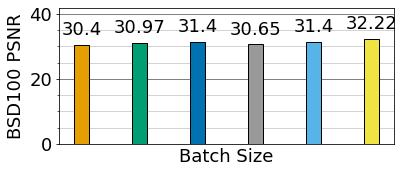

In [970]:
data = get_data(["test.BSD100.psnr_scale_2", "config.batch_size_test"])
filtered_y = data.filter(regex=("test\.BSD100\.psnr_scale_2_rfdn_advanced_batch_size_test.*")).head(1)
filtered_x = data.filter(regex=("config\.batch_size_test_rfdn_advanced_batch_size_test.*")).head(1)
make_bar_chart(filtered_x.values[0], filtered_y.values[0], "Batch Size", "BSD100 PSNR", "batch_size_test_BSD100_PSNR.svg", True, lableprecision=2)